In [51]:
from kloppy import sportec

#event_dataset = sportec.load_open_event_data(match_id="J03WN1")
#events = impect.load_open_data(match_id=122840)

In [8]:
# gets specific event (in this case, goal)
goal_event = event_dataset.get_event_by_id("18226900000272")
print(goal_event)
print(goal_event.player)

<ShotEvent event_id='18226900000272' time='P1T18:04' team='VfL Bochum 1848' player='P. Förster' result='GOAL'>
P. Förster


In [11]:
# uses prev/next to move to forwards/backwards from plays (can also distingush action type as seem below)
assist_event = goal_event.prev("pass.complete")
print(assist_event)

post_goal_event = goal_event.next()
print(post_goal_event)

next_shot_event = goal_event.next("shot")
print(next_shot_event)

<PassEvent event_id='18226900000271' time='P1T18:00' team='VfL Bochum 1848' player='T. Asano' result='COMPLETE'>
<PassEvent event_id='18226900000273' time='P1T19:13' team='Bayer 04 Leverkusen' player='S. Azmoun' result='COMPLETE'>
<ShotEvent event_id='18226900000281' time='P1T19:33' team='VfL Bochum 1848' player='A. Losilla' result='OFF_TARGET'>


In [13]:
# iterating within data structures
shot_events = event_dataset.find_all("shot")
goal_events = event_dataset.find_all("shot.goal")
print(shot_events[0])
print(shot_events[0].qualifiers)
print(shot_events[0].qualifiers[0].value)

<ShotEvent event_id='18226900000020' time='P1T00:52' team='Bayer 04 Leverkusen' player='S. Azmoun' result='BLOCKED'>
[BodyPartQualifier(value=<BodyPart.RIGHT_FOOT: 'RIGHT_FOOT'>)]
BodyPart.RIGHT_FOOT


Text(0.5, 0.5, 'P1T18:04 - Goal by P. Förster (VfL Bochum 1848)')

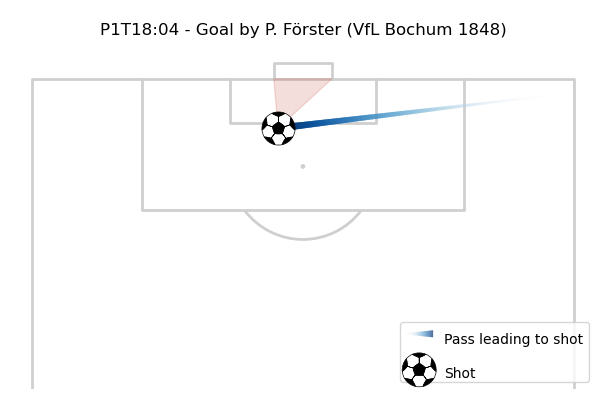

In [17]:
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from kloppy.domain import PositionType

# Setup the pitch
pitch = VerticalPitch(
    half=True, goal_type='box', pad_bottom=-.2,
    line_color="#cfcfcf",
    line_zorder=1,
    pitch_type="metricasports",
    pitch_length=event_dataset.metadata.pitch_dimensions.pitch_length,
    pitch_width=event_dataset.metadata.pitch_dimensions.pitch_width,
)

# We will use mplsoccer's grid function to plot a pitch with a title axis.
fig, axs = pitch.grid(
    figheight=4, endnote_height=0,  # no endnote
    title_height=0.1, title_space=0.02,
    # Turn off the endnote/title axis. I usually do this after
    # I am happy with the chart layout and text placement
    axis=False,
    grid_height=0.83
)

# Plot the goal angle
pitch.goal_angle(
    1-assist_event.receiver_coordinates.x, 1-assist_event.receiver_coordinates.y,
    alpha=0.2, zorder=1.1, color='#cb5a4c', goal='right', ax=axs['pitch']
)
# Plot the assist
pitch.lines(
    1-assist_event.coordinates.x, 1-assist_event.coordinates.y,
    1-assist_event.receiver_coordinates.x, 1-assist_event.receiver_coordinates.y,
    lw=5, transparent=True, comet=True, cmap='Blues', zorder=1.2,
    label='Pass leading to shot', ax=axs['pitch']
)
# Plot the shot
pitch.scatter(
    1-assist_event.receiver_coordinates.x, 1-assist_event.receiver_coordinates.y,
    s=600, marker="football", zorder=1.3, label='Shot', ax=axs['pitch']
)

# Add a legend and title
legend = axs['pitch'].legend(loc='lower right', labelspacing=1.5)
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_va('center')

# Add a title
axs['title'].text(
    0.5, 0.5,
    f'{goal_event.time} - Goal by {goal_event.player} ({goal_event.team})',
    va='center', ha='center', color='black', fontsize=12
)

In [20]:

tracking_dataset = sportec.load_open_tracking_data(
    match_id="J03WN1",
    limit=30000  # optional: for efficiency, we only load the first 30 000 frames
)

In [24]:
first_frame = tracking_dataset[0]
print(first_frame)

<Frame frame_id='10000' time='P1T00:00'>


In [26]:
print(f"Ball coordinates: (x={first_frame.ball_coordinates.x:.2f}, y={first_frame.ball_coordinates.y:.2f})")
for player, coordinates in first_frame.players_coordinates.items():
    print(f"{player} ({player.team}): (x={coordinates.x:.2f}, y={coordinates.y:.2f})")

Ball coordinates: (x=0.51, y=0.51)
Manuel Riemann (VfL Bochum 1848): (x=0.75, y=0.58)
K. Stöger (VfL Bochum 1848): (x=0.50, y=0.51)
P. Hofmann (VfL Bochum 1848): (x=0.50, y=0.80)
D. Heintz (VfL Bochum 1848): (x=0.62, y=0.63)
A. Losilla (VfL Bochum 1848): (x=0.57, y=0.62)
I. Ordets (VfL Bochum 1848): (x=0.50, y=0.86)
S. Janko (VfL Bochum 1848): (x=0.59, y=0.47)
T. Asano (VfL Bochum 1848): (x=0.50, y=0.36)
P. Förster (VfL Bochum 1848): (x=0.50, y=0.54)
C. Antwi-Adjei (VfL Bochum 1848): (x=0.49, y=0.63)
E. Mašović (VfL Bochum 1848): (x=0.49, y=0.74)
L. Hrádecký (Bayer 04 Leverkusen): (x=0.03, y=0.50)
Jonathan Tah (Bayer 04 Leverkusen): (x=0.32, y=0.75)
S. Azmoun (Bayer 04 Leverkusen): (x=0.42, y=0.74)
N. Amiri (Bayer 04 Leverkusen): (x=0.37, y=0.55)
M. Diaby (Bayer 04 Leverkusen): (x=0.50, y=0.37)
M. Bakker (Bayer 04 Leverkusen): (x=0.34, y=0.40)
Edmond Tapsoba (Bayer 04 Leverkusen): (x=0.32, y=0.61)
Exequiel Palacios (Bayer 04 Leverkusen): (x=0.37, y=0.65)
Jeremie Frimpong (Bayer 04 Leve

In [30]:
# Match the goal event with its corresponding tracking frame
matched_frame_idx = goal_event.raw_event["CalculatedFrame"]
goal_frame = tracking_dataset.get_record_by_id(int(matched_frame_idx))


Text(0.5, 0.5, 'P1T18:04 - Goal by P. Förster (VfL Bochum 1848)')

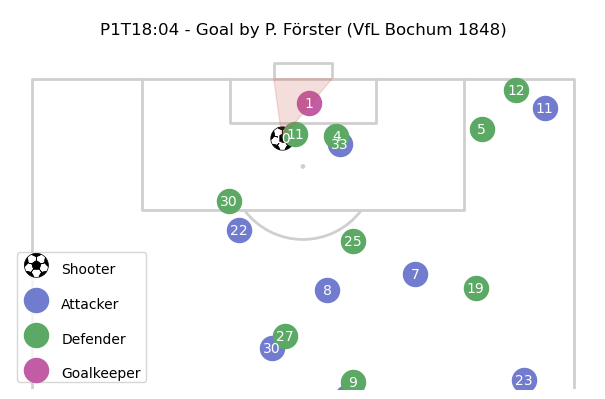

In [32]:
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from kloppy.domain import PositionType

# Setup the pitch
pitch = VerticalPitch(
    half=True, goal_type='box', pad_bottom=-0.2,
    line_color="#cfcfcf",
    line_zorder=1,
    pitch_type="metricasports",
    pitch_length=event_dataset.metadata.pitch_dimensions.pitch_length,
    pitch_width=event_dataset.metadata.pitch_dimensions.pitch_width,
)

# We will use mplsoccer's grid function to plot a pitch with a title axis.
fig, axs = pitch.grid(
    figheight=4, endnote_height=0,  # no endnote
    title_height=0.1, title_space=0.02,
    # Turn off the endnote/title axis. I usually do this after
    # I am happy with the chart layout and text placement
    axis=False,
    grid_height=0.83
)

# Plot the players
goal_scorer = goal_event.player
coordinates = {
  "shooter": {"x": [], "y": []},
  "attacker": {"x": [], "y": []},
  "defender": {"x": [], "y": []},
  "goalkeeper": {"x": [], "y": []},
}
for player, player_coordinates in goal_frame.players_coordinates.items():
    if player == goal_scorer:
        coordinates["shooter"]["x"].append(1-player_coordinates.x)
        coordinates["shooter"]["y"].append(1-player_coordinates.y)
    elif player.starting_position == PositionType.Goalkeeper:
        coordinates["goalkeeper"]["x"].append(1-player_coordinates.x)
        coordinates["goalkeeper"]["y"].append(1-player_coordinates.y)
    elif player.team == goal_scorer.team:
        coordinates["attacker"]["x"].append(1-player_coordinates.x)
        coordinates["attacker"]["y"].append(1-player_coordinates.y)
    else:
        coordinates["defender"]["x"].append(1-player_coordinates.x)
        coordinates["defender"]["y"].append(1-player_coordinates.y)

    # plot the jersey numbers
    pitch.annotate(
        player.jersey_no, (1-player_coordinates.x, 1-player_coordinates.y),
        va='center', ha='center', color='white',
        fontsize=10, ax=axs['pitch']
    )

# Plot the angle to the goal
pitch.goal_angle(coordinates["shooter"]["x"], coordinates["shooter"]["y"] , alpha=0.2, zorder=1.1, color='#cb5a4c', goal='right', ax=axs['pitch'])

# Plot the player coordinates
pitch.scatter(coordinates["shooter"]["x"], coordinates["shooter"]["y"], s=300, marker="football", label='Shooter', ax=axs['pitch'])
pitch.scatter(coordinates["attacker"]["x"], coordinates["attacker"]["y"], s=300, c='#727cce', label='Attacker', ax=axs['pitch'])
pitch.scatter(coordinates["defender"]["x"], coordinates["defender"]["y"], s=300, c='#5ba965', label='Defender', ax=axs['pitch'])
pitch.scatter(coordinates["goalkeeper"]["x"], coordinates["goalkeeper"]["y"], s=300, c='#c15ca5', label='Goalkeeper', ax=axs['pitch'])

# Add a legend
legend = axs['pitch'].legend(loc='lower left', labelspacing=1.5)
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_va('center')

# Add a title
axs['title'].text(
    0.5, 0.5,
    f'{goal_event.time} - Goal by {goal_event.player} ({goal_event.team})',
    va='center', ha='center', color='black', fontsize=12
)

# Soccer Project Brainstorming

## What would be cool

- Passing network between players
- Determining synergy between players
- Create visualization to show synergy between players, on carries, etc

## What steps to take

1. Data exploration (Pretty much done)
2. Data wrangling (In Progress)
3. Pass Networking/Modeling
4. Visualization

### Wrangling Goals

- Move Metadata to queryable format (polars)
- Decide what data is needed (i.e. match metadata, match event data)
- Created reusable data pipeline (creating extraction functions)

### Modeling/Networking Goals

- Create passing network between players within lineups (for example, higher pass rate = greater synergy)
- How effiecent a player is with the ball (ground covered with pass/carry, security of ball, etc)
- Model to evalute how a lineup is performing based on these metrics

### Visualization Goals

- Pitch synergy map (i.e. players that have good synergy are indicated with warm glow, cool for bad synergy, etc)
  - Note: Sportec only has 7 Bundesliga games with full player tracking, can't use in analysis, maybe for visualization? 
- Radar Chart to visualize a player or lineups strengths/weakness via their features

In [126]:
from kloppy import impect
import polars as pl
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

events = impect.load_open_data(match_id=122840)
events

C:\Users\Jerem\anaconda3\envs\soccer_env\lib\site-packages\kloppy\_providers\impect.py:88: UserWarning: 

You are about to use IMPECT public data.
By using this data, you are agreeing to the user agreement. 
The user agreement can be found here: https://github.com/ImpectAPI/open-data/blob/main/LICENSE.pdf

  warnings.warn(


<EventDataset record_count=3239>

In [33]:
matchs_df = pl.read_json("C:/Users/Jerem/Juypter Notebook/Sport Analytics Conference 2026 - Soccer Lineup Analysis/combined_matches.json")
matchs_df

matchId,homeSquad,awaySquad,scheduledDate
i64,struct[2],struct[2],str
122838,"{38,""SV Werder Bremen""}","{33,""FC Bayern München""}","""2023-08-18T18:30:00Z"""
122839,"{41,""Bayer 04 Leverkusen""}","{37,""RasenBallsport Leipzig""}","""2023-08-19T13:30:00Z"""
122840,"{30,""VfL Wolfsburg""}","{432,""1. FC Heidenheim 1846""}","""2023-08-19T13:30:00Z"""
122841,"{31,""TSG 1899 Hoffenheim""}","{34,""SC Freiburg""}","""2023-08-19T13:30:00Z"""
122842,"{46,""VfB Stuttgart""}","{416,""VfL Bochum""}","""2023-08-19T13:30:00Z"""
122843,"{39,""FC Augsburg""}","{32,""Borussia Mönchengladbach""}","""2023-08-19T13:30:00Z"""
122844,"{29,""Borussia Dortmund""}","{27,""1. FC Köln""}","""2023-08-19T16:30:00Z"""
122845,"{446,""1. FC Union Berlin""}","{42,""1. FSV Mainz 05""}","""2023-08-20T13:30:00Z"""
122846,"{35,""Eintracht Frankfurt""}","{36,""SV Darmstadt 98""}","""2023-08-20T15:30:00Z"""


In [34]:
# compiles and stores a dictionary of event data for later reference
def scrape_match_event_data(id_list, num_matches=3):
    match_event_data_dict = {}
    for i in range(num_matches):
        print(f'Loading match {id_list[i]}')
        events = impect.load_open_data(match_id=id_list[i])
        match_event_data_dict[id_list[i]] = events
        print(f'Match {id_list[i]} cached\n')

    return match_event_data_dict

match_event_data_dict = scrape_match_event_data(matchs_df['matchId'])
match_event_data_dict

Loading match 122838
Match 122838 cached

Loading match 122839
Match 122839 cached

Loading match 122840
Match 122840 cached



{122838: <EventDataset record_count=3057>,
 122839: <EventDataset record_count=3253>,
 122840: <EventDataset record_count=3239>}

In [183]:
n = len(matchs_df['matchId'])
BATCHES = {
    '0-50': matchs_df['matchId'][:int(n/6)],
    '51-102': matchs_df['matchId'][int(n/6):int(n/3)],
    '103-154': matchs_df['matchId'][int(n/3):int(n/2)],
}
BATCHES['0-50'], BATCHES['51-102']

(shape: (51,)
 Series: 'matchId' [i64]
 [
 	122838
 	122839
 	122840
 	122841
 	122842
 	122843
 	122844
 	122845
 	122846
 	122847
 	…
 	122879
 	122880
 	122881
 	122882
 	122883
 	122884
 	122885
 	122886
 	122887
 	122888
 ],
 shape: (51,)
 Series: 'matchId' [i64]
 [
 	122889
 	122890
 	122891
 	122892
 	122893
 	122894
 	122895
 	122896
 	122897
 	122898
 	…
 	122930
 	122931
 	122932
 	122933
 	122934
 	122935
 	122936
 	122937
 	122938
 	122939
 ])

In [185]:
# compiles and stores event data in parallel, then writes to JSON
from concurrent.futures import ThreadPoolExecutor

def scrape_match_event_data(id_list, num_matches=[0, 2], output_file='BL_23_24_match_events.parquet'):
    def load_match(match_id):
        try:
            print(f'Loading match {match_id}\n')
            events = impect.load_open_data(match_id=match_id)
            print(f'Match {match_id} cached successfully\n')
            return match_id, events, None
        except Exception as e:
            print(f'Error loading match {match_id}: {str(e)}')
            return match_id, None, str(e)
    
    all_events_df = None
    loaded_matches = []
    failed_matches = []
    
    with ThreadPoolExecutor(max_workers=4) as executor:
        results = executor.map(load_match, id_list[num_matches[0]:num_matches[1]])
        for match_id, events, error in results:
            if error is None and events is not None:
                try:
                    # Convert to dataframe
                    events_df = events.to_df(engine="polars")
                    # Add match_id column
                    events_df = events_df.with_columns(pl.lit(match_id).alias('match_id'))
                    
                    # Concatenate with all previous events using diagonal mode to handle column mismatches
                    if all_events_df is None:
                        all_events_df = events_df
                    else:
                        all_events_df = pl.concat([all_events_df, events_df], how='diagonal')
                    
                    loaded_matches.append(match_id)
                except Exception as e:
                    print(f'Error processing match {match_id}: {str(e)}')
                    failed_matches.append((match_id, str(e)))
            else:
                failed_matches.append((match_id, error))
    
    # Write to JSON file if we have data
    return all_events_df
    if all_events_df is not None:
        all_events_df.write_parquet(output_file)
        print(f'\nAll events written to {output_file}')
        print(f'Successfully loaded: {loaded_matches}')
        print(f'Failed to load: {[m[0] for m in failed_matches]}')
        return all_events_df
    else:
        print(f'No events were successfully loaded.')
        print(f'Failed matches: {failed_matches}')
        return None

match_events_df = scrape_match_event_data(matchs_df['matchId'], num_matches=[0, 51], output_file='BL_23_24_match_events_0_50.parquet')

Loading match 122838
Loading match 122839


Loading match 122840

Loading match 122841

Match 122840 cached successfully

Loading match 122842

Match 122838 cached successfully

Loading match 122843

Match 122839 cached successfully

Loading match 122844

Match 122841 cached successfully

Loading match 122845

Match 122842 cached successfully

Loading match 122846

Match 122844 cached successfully
Match 122843 cached successfully

Loading match 122847


Loading match 122848

Match 122845 cached successfully

Loading match 122849

Match 122846 cached successfully

Loading match 122850

Match 122848 cached successfully

Loading match 122851

Match 122847 cached successfully

Loading match 122852

Match 122849 cached successfully

Loading match 122853

Match 122850 cached successfully
Match 122851 cached successfully

Loading match 122854


Loading match 122855

Match 122852 cached successfully

Loading match 122856

Match 122853 cached successfully

Loading match 122857

Match 122854 cac

In [187]:
#match_events_df.write_csv('BL_23_24_match_events.csv')
match_events_df.write_parquet('BL_23_24_match_events.parquet')

In [188]:
match_events = pl.read_parquet('BL_23_24_match_events.parquet')
match_events

event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,body_part_type,set_piece_type,result,success,duel_type,is_under_pressure,pass_type,goalkeeper_type,match_id,card_type
str,str,i64,duration[μs],duration[μs],str,str,str,str,f64,f64,f64,f64,str,str,str,str,bool,str,bool,str,str,i32,str
"""4858179098""","""PASS""",1,0µs,332ms,"""alive""","""33""","""33""","""204""",0.5,0.5,null,null,null,"""RIGHT_FOOT""","""KICK_OFF""","""INCOMPLETE""",false,null,null,null,null,122838,null
"""4858179099""","""GENERIC:NO_VIDEO""",1,332ms,null,"""alive""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,122838,null
"""4858179100""","""GENERIC:RECEPTION""",1,1s 651ms,null,"""alive""","""33""","""33""","""1202""",0.20381,0.430882,null,null,null,null,null,null,null,null,null,null,null,122838,null
"""4858179101""","""CARRY""",1,1s 651100µs,4s 193ms,"""alive""","""33""","""33""","""1202""",0.20381,0.430882,0.205714,0.501471,null,"""RIGHT_FOOT""",null,"""COMPLETE""",true,null,null,null,null,122838,null
"""4858179102""","""PASS""",1,4s 192999µs,6s 904999µs,"""alive""","""33""","""33""","""1202""",0.205714,0.501471,0.627619,0.091176,null,"""RIGHT_FOOT""",null,"""INCOMPLETE""",false,null,null,null,null,122838,null
"""1028-aerial-duel-4858179103""","""DUEL""",1,6s 905ms,null,"""alive""","""33""","""38""","""1028""",0.372381,0.908824,null,null,null,null,null,"""WON""",true,"""AERIAL""",true,null,null,122838,null
"""231-aerial-duel-4858179103""","""DUEL""",1,6s 905ms,null,"""alive""","""33""","""33""","""231""",0.372381,0.908824,null,null,null,null,null,"""LOST""",false,"""AERIAL""",true,null,null,122838,null
"""4858179103""","""RECOVERY""",1,6s 905ms,null,"""alive""","""33""","""38""","""1028""",0.372381,0.908824,null,null,null,"""HEAD""",null,null,null,null,true,null,null,122838,null
"""4858179104""","""PASS""",1,6s 905100µs,8s 260ms,"""alive""","""33""","""38""","""1028""",0.372381,0.908824,0.308571,0.866176,"""13599""","""HEAD""",null,"""COMPLETE""",true,null,true,"""HEAD_PASS""",null,122838,null


In [129]:

def json_to_csv(match_event_json):
    match_event_df = (
        match_event_json
        .filter(lambda event: event.team is not None)  # Remove events without a team
        .transform(to_orientation="STATIC_HOME_AWAY")
        .filter(lambda event: event.period.id == 1)
        .to_df(engine="polars")
    )
    return match_event_df

In [35]:

events_df_122838 = (
    match_event_data_dict[122838]
    .filter(lambda event: event.team is not None)  # Remove events without a team
    .transform(to_orientation="STATIC_HOME_AWAY")
    .filter(lambda event: event.period.id == 1)
    .to_df(engine="polars")
)

events_df_122838

event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,body_part_type,set_piece_type,result,success,duel_type,is_under_pressure,pass_type,goalkeeper_type
str,str,i64,duration[μs],duration[μs],str,str,str,str,f64,f64,f64,f64,str,str,str,str,bool,str,bool,str,str
"""4858179098""","""PASS""",1,0µs,332ms,"""alive""","""33""","""33""","""204""",0.5,0.5,null,null,null,"""RIGHT_FOOT""","""KICK_OFF""","""INCOMPLETE""",false,null,null,null,null
"""4858179100""","""GENERIC:RECEPTION""",1,1s 651ms,null,"""alive""","""33""","""33""","""1202""",0.79619,0.569118,null,null,null,null,null,null,null,null,null,null,null
"""4858179101""","""CARRY""",1,1s 651100µs,4s 193ms,"""alive""","""33""","""33""","""1202""",0.79619,0.569118,0.794286,0.498529,null,"""RIGHT_FOOT""",null,"""COMPLETE""",true,null,null,null,null
"""4858179102""","""PASS""",1,4s 192999µs,6s 904999µs,"""alive""","""33""","""33""","""1202""",0.794286,0.498529,0.372381,0.908824,null,"""RIGHT_FOOT""",null,"""INCOMPLETE""",false,null,null,null,null
"""1028-aerial-duel-4858179103""","""DUEL""",1,6s 905ms,null,"""alive""","""33""","""38""","""1028""",0.372381,0.908824,null,null,null,null,null,"""WON""",true,"""AERIAL""",true,null,null
"""231-aerial-duel-4858179103""","""DUEL""",1,6s 905ms,null,"""alive""","""33""","""33""","""231""",0.627619,0.091176,null,null,null,null,null,"""LOST""",false,"""AERIAL""",true,null,null
"""4858179103""","""RECOVERY""",1,6s 905ms,null,"""alive""","""33""","""38""","""1028""",0.372381,0.908824,null,null,null,"""HEAD""",null,null,null,null,true,null,null
"""4858179104""","""PASS""",1,6s 905100µs,8s 260ms,"""alive""","""33""","""38""","""1028""",0.372381,0.908824,0.308571,0.866176,"""13599""","""HEAD""",null,"""COMPLETE""",true,null,true,"""HEAD_PASS""",null
"""4858179105""","""GENERIC:RECEPTION""",1,8s 259999µs,null,"""alive""","""33""","""38""","""13599""",0.308571,0.866176,null,null,null,null,null,null,null,null,null,null,null


In [36]:
# returns period lengths (TODO: CHECK FOR LEGITIMACY OF PERIOD 2 LENGTH)
def extract_periods_metadata(periods_metadata):
    period_1_length = periods_metadata[0].end_timestamp.seconds - periods_metadata[0].start_timestamp.seconds
    period_2_length = periods_metadata[1].end_timestamp.seconds - periods_metadata[1].start_timestamp.seconds
    return {'period_1' : period_1_length, 'period_2' : period_2_length}

# returns teams values
def extract_teams_metadata(teams_metadata):
    team_dict = {}
    for i in range(len(teams_metadata)):
        fields = ['team_id', 'name', 'ground', 'starting_formation', 'formations']
        temp_dict = {field : getattr(teams_metadata[i], field) for field in fields}
        temp_dict['starting_formation'] = temp_dict['starting_formation'].value
        temp_dict_key_mapping = {
            'team_id' : f'team_{i}_id', 
            'name' : f'team_{i}_name', 
            'ground' : f'team_{i}_ground', 
            'starting_formation' : f'team_{i}_starting_formation', 
            'formations' : f'team_{i}_formations'
        }
        temp_dict = {temp_dict_key_mapping.get(k, k) : v for k, v in temp_dict.items()}
        team_dict.update(temp_dict)
    return team_dict

# extracts players dicts
def extract_player_metadata(teams_metadata):
    player_dict = {}
    for i in range(len(teams_metadata)):
        players = teams_metadata[i].players
        temp_dict = {}
        for player in players:
            temp_dict[player.player_id] = player.name
        player_dict[f'roster_{i}'] = temp_dict
    return player_dict

# extracts relevant metadata 
def extract_events_metadata(events_metadata):
    teams_dict = extract_teams_metadata(events_metadata.metadata.teams)
    players_dict = extract_player_metadata(events_metadata.metadata.teams)
    periods_dict = extract_periods_metadata(events_metadata.metadata.periods)

    match_metadata_dict = {}
    for metadata_dict in [teams_dict, players_dict, periods_dict]:
        match_metadata_dict.update(metadata_dict)
    return match_metadata_dict
    

In [37]:
metadata_fields = [attr for attr in dir(events.metadata) if not attr.startswith('__')]
metadata_values = [getattr(events.metadata, field) for field in metadata_fields]
metadata_dict = {field : values for field, values in zip(metadata_fields, metadata_values)}
#metadata_dict
#metadata_df = pl.DataFrame(metadata_dict)
#metadata_df

In [38]:
events_df = (
    events
    .filter(lambda event: event.team is not None)  # Remove events without a team
    .transform(to_orientation="STATIC_HOME_AWAY")
    .filter(lambda event: event.period.id == 1)
    .to_df(engine="polars")
)

events_df.shape

(1601, 22)

In [39]:
pl.Config.set_tbl_rows(20)
events_df.head(20)


event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,body_part_type,set_piece_type,result,success,is_under_pressure,pass_type,duel_type,goalkeeper_type
str,str,i64,duration[μs],duration[μs],str,str,str,str,f64,f64,f64,f64,str,str,str,str,bool,bool,str,str,str
"""4614761966""","""PASS""",1,0µs,1s 340ms,"""alive""","""432""","""432""","""46957""",0.5,0.5,0.640952,0.547059,"""26476""","""RIGHT_FOOT""","""KICK_OFF""","""COMPLETE""",true,null,null,null,null
"""4614761967""","""GENERIC:RECEPTION""",1,1s 340ms,null,"""alive""","""432""","""432""","""26476""",0.640952,0.547059,null,null,null,null,null,null,null,null,null,null,null
"""4614761968""","""CARRY""",1,1s 340100µs,2s 892ms,"""alive""","""432""","""432""","""26476""",0.640952,0.547059,0.640952,0.547059,null,"""RIGHT_FOOT""",null,"""COMPLETE""",true,null,null,null,null
"""4614761969""","""PASS""",1,2s 891999µs,6s 26999µs,"""alive""","""432""","""432""","""26476""",0.640952,0.547059,0.189524,0.836765,null,"""RIGHT_FOOT""",null,"""INCOMPLETE""",false,null,null,null,null
"""4614761970""","""RECOVERY""",1,6s 27ms,null,"""alive""","""432""","""30""","""4669""",0.189524,0.836765,null,null,null,"""HEAD""",null,null,null,true,null,null,null
"""4614761971""","""PASS""",1,6s 27099µs,6s 762999µs,"""alive""","""432""","""30""","""4669""",0.189524,0.836765,0.320952,0.755882,null,"""HEAD""",null,"""INCOMPLETE""",false,true,"""HEAD_PASS""",null,null
"""4614761972""","""RECOVERY""",1,6s 762999µs,null,"""alive""","""432""","""432""","""46957""",0.320952,0.755882,null,null,null,"""OTHER""",null,null,null,true,null,null,null
"""4614761973""","""CARRY""",1,6s 763099µs,9s 303999µs,"""alive""","""432""","""432""","""46957""",0.320952,0.755882,0.265714,0.823529,null,"""OTHER""",null,"""INCOMPLETE""",false,true,null,null,null
"""4614761974""","""DUEL""",1,9s 304ms,null,"""alive""","""30""","""30""","""7755""",0.265714,0.823529,null,null,null,"""RIGHT_FOOT""",null,"""WON""",true,true,null,"""GROUND""",null


In [70]:
# converts events_df into usable data for logistic regression
def agg_pass_data(events_df, features):
    pass_events_df = events_df.filter(events_df['event_type'] == 'PASS')
    
    return 0

# would ball_owning_team be something to keep in this regression?
features = ['timestamp', 'end_timestamp', 'ball_owning_team', 'player_id', 'coordinates_x', 'coordinates_y', 
            'end_coordinates_x', 'end_coordinates_y', 'receiver_player_id',	'body_part_type', 'set_piece_type',	'result', 'success', 'is_under_pressure',
            'pass_type', 'duel_type', 'goalkeeper_type']

body_part_mapping = {
    "RIGHT_FOOT" : 1,
    "HEAD" : 2,
    "KEEPER_ARM" : 3
}

pass_type_mapping = {
    "HIGH_PASS" : 1,
    "ASSIST" : 2,
    "HAND_PASS" : 3,
    "HEAD_PASS" : 4,
    "CROSS" : 5,
    "SHOT_ASSIST" : 6,
    "CHIPPED_PASS" : 7,
    None : 0
}

pass_events_df = (
    events_df
    .filter(events_df['event_type'] == 'PASS')
    .select(features)
)
'''
(pl.col('end_timestamp') - pl.col('timestamp'))
    .cast(pl.Float32, strict=True)
    .fill_null(0)
    .alias('pass_time'),
'''
pass_events_df = pass_events_df.with_columns(
    # Pass duration
    (pl.col('end_timestamp') - pl.col('timestamp'))
    .dt.total_milliseconds()
    .cast(pl.Float32)
    .truediv(1000)
    .fill_null(0)
    .alias('pass_time'),
    

    # Pass distance (Euclidean)
    ((pl.col('end_coordinates_x') - pl.col('coordinates_x'))**2 + 
     (pl.col('end_coordinates_y') - pl.col('coordinates_y'))**2)
        .sqrt()
        .fill_null(0)
        .alias('pass_distance'),

    # Distance from pass origin to goal (1.0, 0.5)
    ((1.0 - pl.col('coordinates_x'))**2 + 
     (0.5 - pl.col('coordinates_y'))**2)
        .sqrt()
        .alias('start_dist_to_goal'),
    
    # Distance from pass destination to goal (1.0, 0.5)
    ((1.0 - pl.col('end_coordinates_x'))**2 + 
     (0.5 - pl.col('end_coordinates_y'))**2)
        .sqrt()
        .alias('end_dist_to_goal'),
    
    # Body part encoding
    pl.col("body_part_type")
        .replace(body_part_mapping)
        .cast(pl.Int64, strict=True)
        .fill_null(0)
        .alias("body_part_int"),
    
    # Pass type encoding
    pl.col("pass_type")
        .replace(pass_type_mapping)
        .cast(pl.Int64, strict=True)
        .fill_null(0)
        .alias("pass_type_int"),
    
    # Under pressure flag
    pl.col("is_under_pressure")
        .cast(pl.Int64, strict=True)
        .fill_null(0)
        .alias("is_under_pressure_int"),

    # pass success
    pl.col('success')
        .cast(pl.Int64, strict=True)
        .fill_null(0)
        .alias("success_int"),
)

pass_events_df = pass_events_df.with_columns(
    # Progressive flag
    ((pl.col('start_dist_to_goal') - pl.col('end_dist_to_goal')) / pl.col('start_dist_to_goal') >= 0.25)
        .and_(pl.col('success_int') == 1)
        .and_(
            ~(pl.col('coordinates_x') >= 0.85)
            .and_(pl.col('coordinates_y').is_between(0.225, 0.775))
        )
        .cast(pl.Int8)
        .alias('is_progressive'),

    pl.col('is_under_pressure').fill_null(False),
)


filtered_events = ['pass_time', 'pass_distance', 'body_part_int', 'pass_type_int', 'is_progressive', 'is_under_pressure_int', 'success_int']

filtered_events_df = pass_events_df[filtered_events]

pass_events_df


timestamp,end_timestamp,ball_owning_team,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,body_part_type,set_piece_type,result,success,is_under_pressure,pass_type,duel_type,goalkeeper_type,pass_time,pass_distance,start_dist_to_goal,end_dist_to_goal,body_part_int,pass_type_int,is_under_pressure_int,success_int,is_progressive
duration[μs],duration[μs],str,str,f64,f64,f64,f64,str,str,str,str,bool,bool,str,str,str,f32,f64,f64,f64,i64,i64,i64,i64,i8
0µs,1s 340ms,"""432""","""46957""",0.5,0.5,0.640952,0.547059,"""26476""","""RIGHT_FOOT""","""KICK_OFF""","""COMPLETE""",true,false,null,null,null,1.34,0.1486,0.5,0.362118,1,0,0,1,1
2s 891999µs,6s 26999µs,"""432""","""26476""",0.640952,0.547059,0.189524,0.836765,null,"""RIGHT_FOOT""",null,"""INCOMPLETE""",false,false,null,null,null,3.135,0.536393,0.362118,0.877657,1,0,0,0,0
6s 27099µs,6s 762999µs,"""432""","""4669""",0.189524,0.836765,0.320952,0.755882,null,"""HEAD""",null,"""INCOMPLETE""",false,true,"""HEAD_PASS""",null,null,0.735,0.154322,0.877657,0.725659,2,4,1,0,0
10s 653ms,11s 663ms,"""30""","""16789""",0.254286,0.775,0.350476,0.807353,"""7755""","""RIGHT_FOOT""",null,"""COMPLETE""",true,true,null,null,null,1.01,0.101486,0.794805,0.718573,1,0,1,1,0
11s 663100µs,12s 379ms,"""30""","""7755""",0.350476,0.807353,0.322857,0.744118,"""16789""","""RIGHT_FOOT""",null,"""COMPLETE""",true,false,null,null,null,0.715,0.069004,0.718573,0.719803,1,0,0,1,0
12s 379099µs,13s 572999µs,"""30""","""16789""",0.322857,0.744118,0.448571,0.536765,null,"""RIGHT_FOOT""",null,"""INCOMPLETE""",false,true,"""CHIPPED_PASS""",null,null,1.193,0.242486,0.719803,0.552653,1,7,1,0,0
16s 375ms,17s 656ms,"""432""","""1457""",0.397143,0.616176,0.332381,0.441176,"""63569""","""RIGHT_FOOT""",null,"""COMPLETE""",true,true,null,null,null,1.281,0.186599,0.613949,0.670205,1,0,1,1,0
20s 62ms,20s 199ms,"""432""","""63569""",0.285714,0.610294,0.267619,0.660294,null,"""RIGHT_FOOT""",null,"""INCOMPLETE""",false,true,null,null,null,0.137,0.053174,0.722751,0.749717,1,0,1,0,0
22s 952999µs,24s 766999µs,"""432""","""46957""",0.345714,0.714706,0.493333,0.789706,"""66510""","""RIGHT_FOOT""",null,"""COMPLETE""",true,false,null,null,null,1.814,0.165579,0.688613,0.583644,1,0,0,1,0


In [44]:
match_metadata_dict = extract_events_metadata(events)
match_metadata_dict

{'team_0_id': '30',
 'team_0_name': 'VfL Wolfsburg',
 'team_0_ground': home,
 'team_0_starting_formation': '4-3-3',
 'team_0_formations': <TimeContainer>,
 'team_1_id': '432',
 'team_1_name': '1. FC Heidenheim 1846',
 'team_1_ground': away,
 'team_1_starting_formation': '4-1-3-2',
 'team_1_formations': <TimeContainer>,
 'roster_0': {'957': 'Yannick Gerhardt',
  '996': 'Koen Casteels',
  '3503': 'Jonas Wind',
  '4669': 'Ridle Baku',
  '7369': 'Mattias Svanberg',
  '7755': 'Vaclav Cerny',
  '13276': 'Sebastiaan Bornauw',
  '13567': 'Joakim Maehle',
  '16789': 'Lovro Majer',
  '27568': 'Maxence Lacroix',
  '29485': 'Cédric Zesiger',
  '30434': 'Pavao Pervan',
  '32706': 'Aster Vranckx',
  '33303': 'Nicolas Cozza',
  '38637': 'Moritz Jenz',
  '49887': 'Tiago Tomás',
  '53653': 'Patrick Wimmer',
  '56370': 'Jakub Kaminski',
  '57263': 'Kevin Paredes',
  '104738': 'Dzenan Pejcinovic'},
 'roster_1': {'1313': 'Jonas Föhrenbach',
  '1443': 'Benedikt Gimber',
  '1457': 'Marnon Busch',
  '10244':

In [17]:
# creates a network based on the frequency of passes (future iterations will attempt to consider pass length, type, time, contest, turnover, etc)
def populate_pass_dict(match_metadata_dict, events):
    # define directed graph, roster dict, df filters
    roster_pass_dict = {
        match_metadata_dict['team_0_id'] : match_metadata_dict['roster_0'],
        match_metadata_dict['team_1_id'] : match_metadata_dict['roster_1']
    }
    pass_events = events.filter(events['event_type'] == 'PASS')

    # Initialize pass dictionaries
    roster_ids = [match_metadata_dict['team_0_id'], match_metadata_dict['team_1_id']]
    for roster_id in roster_ids:
        for player_id in roster_pass_dict[roster_id]:
            roster_pass_dict[roster_id][player_id] = [roster_pass_dict[roster_id][player_id], {}]

    # create initial data dicts
    pass_events = events_df.filter(events_df['event_type'] == 'PASS')

    # map fields to polars ids
    fields_to_index = {
        'ball_owning_team' : 6,
        'team_id' : 7,
        'player_id' : 8,
        'receiver_player_id' : 13,
        'success' : 17
    }
    
    # increment player's pass frequency using cond statements
    for pass_event in pass_events.iter_rows():
        # if player makes a completed pass to a teammate, increment their pass frequency by 1
        if pass_event[13] is not None and pass_event[17]:
            team = pass_event[6]
            player = pass_event[8]
            receiver = pass_event[13]
            
            # check if player exists in team roster
            if player not in roster_pass_dict[team]:
                print(f"Player {player} not found in team {team}")
                continue
            
            #print(roster_pass_dict[team][player][1])
            roster_pass_dict[team][player][1][receiver] = roster_pass_dict[team][player][1].get(receiver, 0) + 1

    return roster_pass_dict

In [117]:
match_metadata_dict = extract_events_metadata(events)
roster_pass_dict = populate_pass_dict(match_metadata_dict, events_df)
roster_pass_dict['30'].keys()

Player 29485 not found in team 432
Player 29485 not found in team 432


dict_keys(['957', '996', '3503', '4669', '7369', '7755', '13276', '13567', '16789', '27568', '29485', '30434', '32706', '33303', '38637', '49887', '53653', '56370', '57263', '104738'])

In [19]:
team_network_ids = {
    '30' : ['VfL Wolfsburg', nx.DiGraph()],
    '432' : ['1. FC Heidenheim 1846', nx.DiGraph()]
}

# TODO: Iterate through pass_dict and create network based on frequency
# create pass network for individual teams
def create_pass_network(roster_pass_dict, team_network_ids):
    DG_dict = {}
    for team_network in team_network_ids.items():
        team_id = team_network[0]
        team_name = team_network[1][0]
        team_DG = team_network[1][1]
        pass_list = []
        for roster in roster_pass_dict[team_id].items():
            passer_id = roster[0]
            print(passer_id)
            passer_name = roster[1][0]
            print(passer_name)
            passer_passes = roster[1][1]
            print(passer_passes)
            for receiver_id, pass_freq in passer_passes.items():
                #print(receiver_id, pass_freq)
                pass_list.append((passer_id, receiver_id, pass_freq))
        team_DG.add_weighted_edges_from(pass_list)
        DG_dict[team_id] = team_DG
    return DG_dict
pass_network_dict = create_pass_network(roster_pass_dict, team_network_ids)
pass_network_dict

957
Yannick Gerhardt
{'13567': 4, '16789': 2, '27568': 3, '29485': 3, '7369': 2, '4669': 1}
996
Koen Casteels
{'957': 2, '29485': 6, '13567': 1, '27568': 4, '4669': 4}
3503
Jonas Wind
{'4669': 1, '16789': 1, '29485': 1, '7369': 1, '13567': 2}
4669
Ridle Baku
{'996': 3, '957': 3, '7369': 5, '27568': 6, '7755': 6, '3503': 2, '13567': 1}
7369
Mattias Svanberg
{'7755': 4, '957': 2, '4669': 4, '16789': 2, '27568': 1, '3503': 2}
7755
Vaclav Cerny
{'16789': 2, '4669': 2, '27568': 1, '7369': 1, '3503': 1}
13276
Sebastiaan Bornauw
{}
13567
Joakim Maehle
{'3503': 4, '53653': 3, '16789': 5, '29485': 15, '27568': 1, '7369': 1}
16789
Lovro Majer
{'7755': 4, '53653': 1, '4669': 1, '7369': 2, '27568': 1, '13567': 1, '957': 2, '29485': 2, '3503': 1, '996': 1}
27568
Maxence Lacroix
{'29485': 20, '4669': 6, '7369': 3, '957': 4, '7755': 2, '996': 3}
29485
Cédric Zesiger
{'27568': 14, '13567': 16, '3503': 1, '16789': 7, '996': 4, '53653': 3, '957': 1}
30434
Pavao Pervan
{}
32706
Aster Vranckx
{}
33303
Nic

{'30': <networkx.classes.digraph.DiGraph at 0x16c89785a00>,
 '432': <networkx.classes.digraph.DiGraph at 0x16c89785e80>}

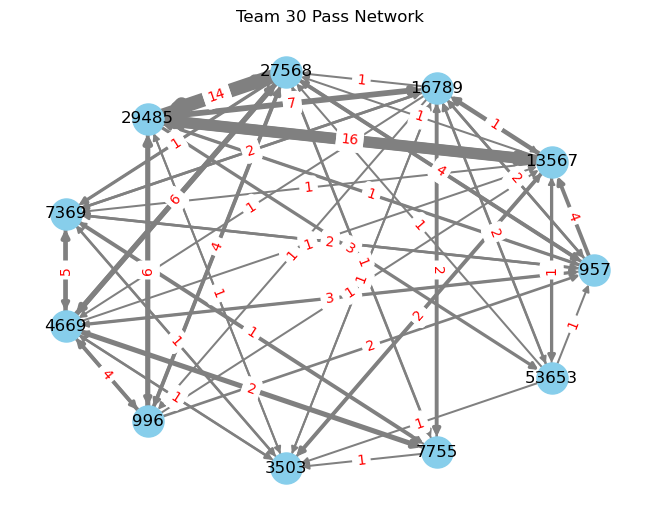

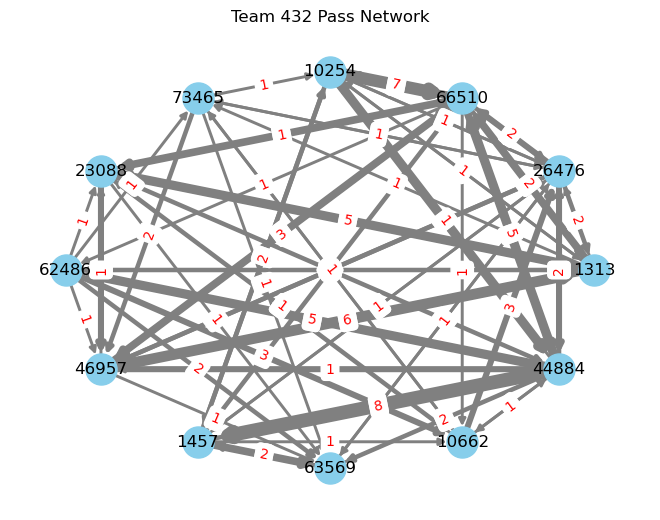

In [21]:
def draw_pass_network(pass_network, team_id):
    DG = pass_network
    pos = nx.circular_layout(DG)
    
    # extract edge weights for line thickness
    edges = DG.edges(data=True)
    weights = [d.get('weight', 1) for _, _, d in edges]
    
    # normalize weights to a reasonable visual range (1-10)
    max_w = max(weights) if weights else 1
    widths = [1 + 9 * (w / max_w) for w in weights]
    
    nx.draw(DG, pos, with_labels=True, node_color='skyblue', node_size=500,
            edge_color='gray', width=widths)
    
    edge_labels = nx.get_edge_attributes(DG, 'weight')
    nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels, font_color='red')
    
    plt.title(f"Team {team_id} Pass Network")
    plt.axis('off')
    plt.show()

#draw_pass_network(pass_network_dict['30'])
for team_id, team_network in pass_network_dict.items():
    draw_pass_network(pass_network_dict[team_id], team_id)

In [122]:

EXAMPLE_LINEUPS = {
    '30': ['957', '996', '3503', '4669', '7369', '7755', '13567', '16789', '27568', '29485', '53653']
}
(roster_pass_dict['30'].keys())

dict_keys(['957', '996', '3503', '4669', '7369', '7755', '13276', '13567', '16789', '27568', '29485', '30434', '32706', '33303', '38637', '49887', '53653', '56370', '57263', '104738'])

In [123]:
pass_events_list = pass_events_df.select([
    pl.col('player_id').alias('player_id'),
    pl.col('receiver_player_id').alias('receiver_player_id'),
    pl.col('success_int').cast(pl.Boolean).alias('success'),
    pl.col('is_progressive').cast(pl.Boolean).alias('is_progressive'),
    pl.col('end_coordinates_x').alias('end_coordinates_x'),
    pl.col('is_under_pressure').alias('is_under_pressure'),
]).to_dicts()

def build_pass_network(pass_events, lineup, min_passes=1):

    G = nx.DiGraph()
    G.add_nodes_from(lineup)

    edge_data = {}
    for p in pass_events:
        passer, reciever = p['player_id'], p['receiver_player_id']
        if passer not in lineup or reciever not in lineup:
            continue
        pass_key = (passer, reciever)
        if pass_key not in edge_data:
            edge_data[pass_key] = {
                'total_passes': 0,
                'completed_passes': 0,
                'progressive_passes': 0,
                'end_x_sum': 0,
                'contested_passes': 0,
            }
        edge_data[pass_key]['total_passes'] += 1
        edge_data[pass_key]['completed_passes'] += int(p.get('success', True))
        edge_data[pass_key]['progressive_passes'] += int(p.get('is_progressive', True))
        edge_data[pass_key]['end_x_sum'] += p.get("end_coordinates_x", 60.0)
        edge_data[pass_key]['contested_passes'] += p.get('is_under_pressure', True)

    for (passer, reciever), d in edge_data.items():
        if d['total_passes'] < min_passes:
            continue
        G.add_edge(
            passer, reciever,
            weight=d['completed_passes'],
            total=d['total_passes'],
            completion_rate=d['completed_passes'] / d['total_passes'],
            progressive=d['progressive_passes'],
            contested_passes=d['contested_passes'],
            avg_x_end=d['end_x_sum'] / d['total_passes'],
            composite_weight=(
                0.5 * d['completed_passes']
                + 0.25 * d['progressive_passes']
                + 0.2 * d['total_passes'] * (d['completed_passes'] / d['total_passes'])
                + 0.05 * d['contested_passes']
            ),
        )
    return G

    
pass_net = build_pass_network(pass_events_list, EXAMPLE_LINEUPS['30'])
#pass_net
type(match_metadata_dict['team_0_id'])

str

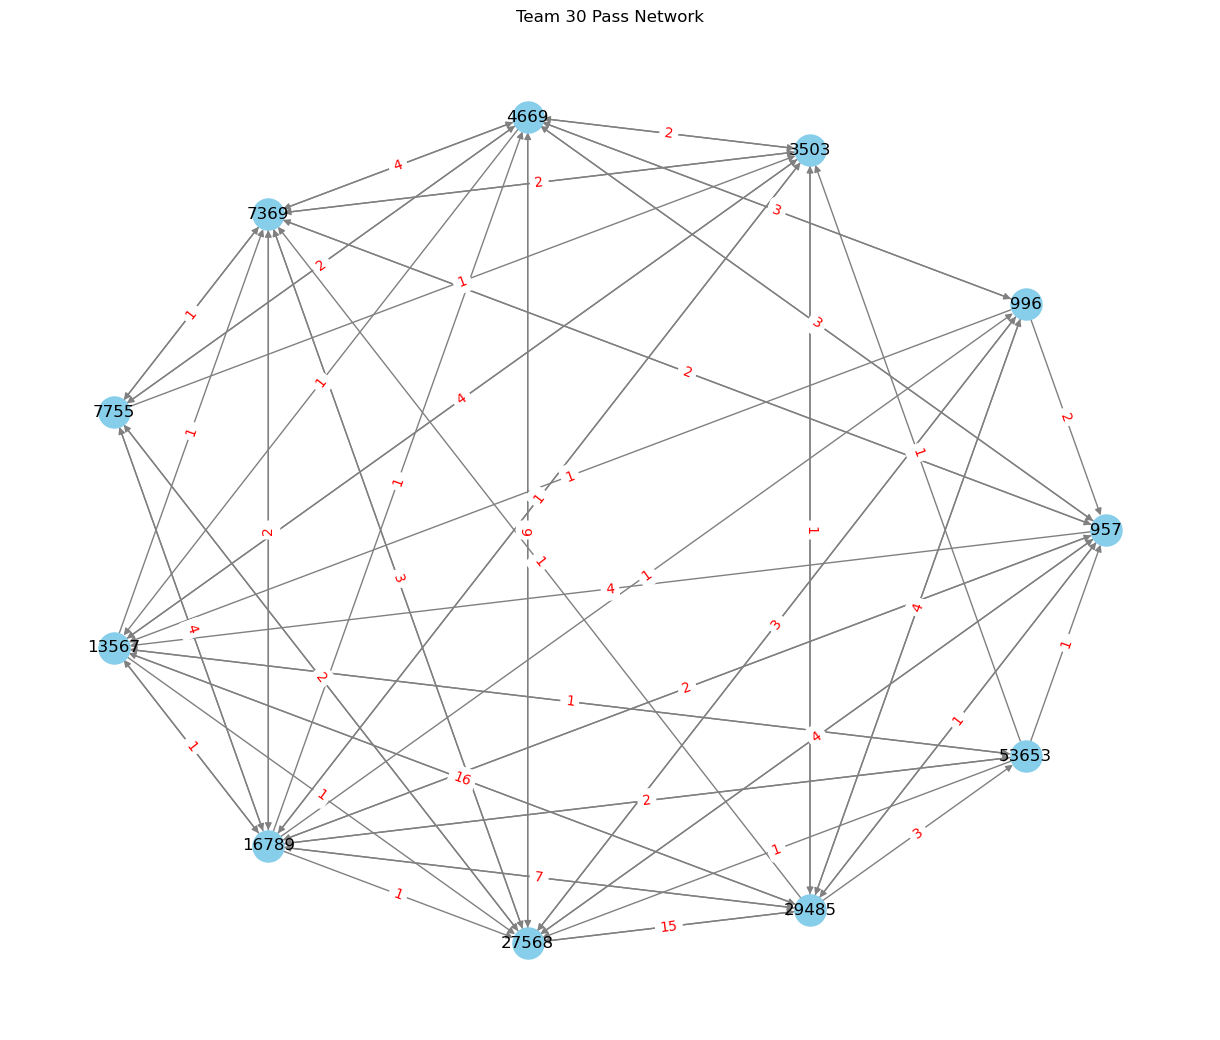

In [124]:
plt.figure(figsize=(12, 10))
pos = nx.circular_layout(pass_net)
nx.draw(pass_net, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
edge_labels = nx.get_edge_attributes(pass_net, 'weight')
nx.draw_networkx_edge_labels(pass_net, pos, edge_labels=edge_labels, font_color='red')
plt.title(f"Team 30 Pass Network")
plt.axis('off')
plt.show()

In [113]:
def compute_player_metrics(G):

    metrics = {}

    # percentage of possible connections a player has to other players
    degree_centrality = nx.degree_centrality(G)
    # connect between players (i.e. how is the passing middleman)
    betweenness_centrality = nx.betweenness_centrality(G, weight="weight", normalized=True)
    # determines what highly targeted player pass to other highly targeted players
    pagerank = nx.pagerank(G, weight='weight', alpha=0.85)
    # which passing partners pass with each other (passing triangles)
    clustering_coeff = nx.clustering(G, weight='weight')

    undir_G = G.to_undirected()
    try:
        # how many connections your connections have
        ev_centrality = nx.eigenvector_centrality_numpy(undir_G, weight='weight')
    except Exception:
        ev_centrality = {n: 0.0 for n in G.nodes()}

    for player in G.nodes():
        in_strength = sum(d['weight'] for i, j, d in G.in_edges(player, data=True))
        out_strength = sum(d['weight'] for i, j, d in G.out_edges(player, data=True))
        metrics[player] = {
            'degree_centrality': degree_centrality.get(player, 0),
            'betweenness_centrality': betweenness_centrality.get(player, 0),
            'pagerank': pagerank.get(player, 0),
            'clustering_coeff': float(clustering_coeff.get(player, 0)),
            'ev_centrality': float(ev_centrality.get(player, 0)),
            'in_strength': in_strength,
            'out_strength': out_strength,
        }

    return metrics


player_metrics = compute_player_metrics(pass_net)
#player_metrics

In [191]:
def compute_team_metrics(G):

    n = G.number_of_nodes()
    m = G.number_of_edges()

    # edges / potential edges (high means frequent passing)
    density = nx.density(G)
    # how many passing triangles appear in network (A -> B, B -> C, C -> A)
    avg_cluster = nx.average_clustering(G, weight='weight')
    # what fraction of passes go both ways between players (A -> B and B -> A)
    reciprocity = nx.reciprocity(G) if m > 0 else 0

    # can every player reach on another via passing? ( would exclude clusters and 
    n_strong_connected_components = nx.number_strongly_connected_components(G)
    max_strong_connected_components = max(nx.strongly_connected_components(G), key=len)
    strong_component_ratio = len(max_strong_connected_components) / n

    # how does the network fair went a edge is removed (are they dependent on one player)
    undir_G = G.to_undirected()
    try:
        algebraic_connectivity = nx.algebraic_connectivity(undir_G, weight="weight")
    except Exception:
        algebraic_connectivity = 0.0

    # how many passes are required to get between two players (lower for more direct pathes)
    try:
        G_inv = G.copy()
        for u, v, d in G_inv.edges(data=True):
            d['distance'] = 1.0 / (d['weight'] + 1e-6)
        asp = nx.average_shortest_path_length(G_inv, weight='distance')
    except nx.NetworkXError:
        asp = float('inf')
        
    # gets raw sum of progressive passes
    total_progressive_passes = sum(d.get('is_progressive', 0) for _, _, d in G.edges(data=True))

    # how evenly distributed are the passes between players?
    weights = np.array([d['weight'] for _, _, d in G.edges(data=True)], dtype=float)
    if weights.sum() > 0:
        p = weights / weights.sum()
        p = p[p > 0]
        entropy = -np.sum(p * np.log2(p))
        max_entropy = np.log2(len(p)) if len(p) > 1 else 1.0
        norm_entropy = entropy / max_entropy
    else:
        norm_entropy = 0
    
    # how central is the passing flow (ball mainly goes through one player or multiple?)
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight', normalized=True)
    betweenness_centrality_vals = list(betweenness_centrality.values())
    max_bc = max(betweenness_centrality_vals)
    centralization = (sum(max_bc - b for b in betweenness_centrality_vals)
                      / ((n - 1) * (n - 2))) if n > 2 else 0
    
    return {
        'density': density,
        'avg_clustering': float(avg_cluster),
        'reciprocity': reciprocity,
        'strong_connectivity_ratio': strong_component_ratio,
        'algebraic_connectivity': float(algebraic_connectivity),
        'avg_shortest_path': asp,
        'total_progressive_passes': total_progressive_passes,
        'edge_weight_entropy': float(norm_entropy),
        'flow_centralization': centralization
    }

team_metrics = compute_team_metrics(pass_net)   
team_metrics

{'density': 0.6272727272727273,
 'avg_clustering': 0.08578961164565864,
 'reciprocity': 0.782608695652174,
 'strong_connectivity_ratio': 1.0,
 'algebraic_connectivity': 8.786575172485733,
 'avg_shortest_path': 0.49895542146070737,
 'total_progressive_passes': 0,
 'edge_weight_entropy': 0.900752880109243,
 'flow_centralization': 0.016526748971193418}

In [192]:
# basic initial weights that determine how important values are
FEATURE_WEIGHTS = {
    "density": 0.10,
    "avg_clustering": 0.15, 
    "reciprocity": 0.10, 
    "strong_connectivity_ratio": 0.10,
    "algebraic_connectivity": 0.10,
    "avg_shortest_path": -0.10,
    "total_progressive_passes": 0.15,
    "edge_weight_entropy": 0.10,
    "flow_centralization": -0.10,
}

In [193]:
def normalize_metrics(all_lineups_metrics):
    # minmax scale along all lineups
    keys = all_lineups_metrics[0].keys()
    mins = {k: min(m[k] for m in all_lineups_metrics) for k in keys}
    maxs = {k: max(m[k] for m in all_lineups_metrics) for k in keys}

    normed = []
    for m in all_lineups_metrics:
        nm = {}
        for k in keys:
            rng = maxs[k] - mins[k]
            nm[k] = (m[k] - mins[k]) / rng if rng > 0 else 0.5
        normed.append(nm)
    return normed

def score_lineup(team_metrics, weights):
    score = 0
    for metric, w in weights.items():
        score += w * team_metrics.get(metric, 0)
    return score

In [195]:
raw_metrics = []
for lineup_id, lineup in EXAMPLE_LINEUPS.items():
    pass_net = build_pass_network(pass_events_list, lineup)
    cur_metrics = compute_team_metrics(pass_net)
    raw_metrics.append(cur_metrics)

normed = normalize_metrics(raw_metrics)

for i, (lineup_id, lineup) in enumerate(EXAMPLE_LINEUPS.items()):
    score = score_lineup(normed[i], FEATURE_WEIGHTS)
    print(f"Lineup {lineup_id}: {score:.4f}")

Lineup 30: 0.3000


In [404]:
# Define column types
categorical_cols = ['body_part_int', 'pass_type_int']
body_part_encoded = ['body_part_int_2', 'body_part_int_3']
pass_type_encoded = ['pass_type_int_1', 'pass_type_int_2', 'pass_type_int_3', 
                    'pass_type_int_4', 'pass_type_int_5', 'pass_type_int_6', 'pass_type_int_7']
continuous_cols = ['pass_time', 'pass_distance']
binary_cols = ['is_under_pressure_int']
target = 'success_int'

df_encoded = filtered_events_df.to_dummies(columns=categorical_cols)
#df_encoded['body_part_int_1'].value_counts()
#df_encoded

In [407]:
y = df_encoded[target].to_numpy()
X = df_encoded[continuous_cols]
scaler = StandardScaler()

X = scaler.fit_transform(X)
X = X
X = sm.add_constant(X)
print(X)
print(X.shape)
#df_encoded

[[ 1.         -0.22922358 -0.55092498]
 [ 1.          1.82381834  2.05205583]
 [ 1.         -0.92119588 -0.51251733]
 ...
 [ 1.          0.13334705  0.80625684]
 [ 1.          1.3377219   0.75056796]
 [ 1.         -0.48542486 -0.09409458]]
(523, 3)


In [409]:
# Define column types
categorical_cols = ['body_part_int', 'pass_type_int']
body_part_encoded = ['body_part_int_2', 'body_part_int_3']
pass_type_encoded = ['pass_type_int_1', 'pass_type_int_2', 'pass_type_int_3', 
                    'pass_type_int_4', 'pass_type_int_5', 'pass_type_int_6', 'pass_type_int_7']
continuous_cols = ['pass_time', 'pass_distance']
binary_cols = ['is_under_pressure_int']
target = 'success_int'

# 1. One-hot encode categorical variables
df_encoded = filtered_events_df.to_dummies(columns=categorical_cols)

y = df_encoded[target].to_numpy()

# 2. Scale only continuous columns
X_continuous = df_encoded[continuous_cols].to_numpy()
scaler = StandardScaler()
X_continuous = scaler.fit_transform(X_continuous)

# 3. Get binary/dummy columns (no scaling)
X_binary = df_encoded[binary_cols + body_part_encoded + pass_type_encoded].to_numpy()

# 4. Combine and add constant
X = np.hstack([X_continuous, X_binary])
X = sm.add_constant(X)

feature_names = continuous_cols + binary_cols + body_part_encoded + pass_type_encoded
print(X.shape)

(523, 13)


In [361]:
import statsmodels.api as sm

# Fit logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit(method='bfgs', maxiter=1000)

# Print full summary with p-values, z-scores, conf intervals
#print(result.summary(xname=['const'] + continuous_cols + binary_cols + body_part_encoded + pass_type_encoded))

Optimization terminated successfully.
         Current function value: 0.568634
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14


In [411]:
import polars as pl
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split





# 2. Get feature matrix and target
feature_cols = [c for c in df_encoded.columns if c != target]
print(feature_cols)
X = df_encoded.select(feature_cols).to_numpy()
y = df_encoded.select(target).to_numpy().ravel()

# 3. Identify which columns are continuous (need scaling)
continuous_indices = [
    df_encoded.select(feature_cols).columns.index(col) 
    for col in continuous_cols
]

# 4. Scale continuous features only
scaler = StandardScaler()
X[:, continuous_indices] = scaler.fit_transform(X[:, continuous_indices])

print(X)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 7. Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

['pass_time', 'pass_distance', 'body_part_int_1', 'body_part_int_2', 'body_part_int_3', 'pass_type_int_0', 'pass_type_int_1', 'pass_type_int_2', 'pass_type_int_3', 'pass_type_int_4', 'pass_type_int_5', 'pass_type_int_6', 'pass_type_int_7', 'is_under_pressure_int']
[[-0.22922358 -0.55092498  1.         ...  0.          0.
   0.        ]
 [ 1.82381834  2.05205583  1.         ...  0.          0.
   0.        ]
 [-0.92119588 -0.51251733  0.         ...  0.          0.
   1.        ]
 ...
 [ 0.13334705  0.80625684  1.         ...  0.          0.
   0.        ]
 [ 1.3377219   0.75056796  1.         ...  0.          0.
   1.        ]
 [-0.48542486 -0.09409458  1.         ...  0.          0.
   0.        ]]
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.71      0.43      0.53        28
           1       0.82      0.94      0.87        77

    accuracy                           0.80       105
   macro avg       0.76      0.68      0.70       105
we

In [424]:
for name, coef in sorted(zip(feature_names, model.coef_[0]), key=lambda x: abs(x[1]), reverse=False):
    print(f"{name}: {coef:+.4f}")

pass_distance: -0.0586
is_under_pressure_int: -0.0852
pass_type_int_4: -0.0852
pass_time: +0.1138
pass_type_int_7: -0.1821
body_part_int_2: +0.2124
pass_type_int_3: +0.2124
pass_type_int_2: -0.3372
pass_type_int_6: +0.6622
pass_type_int_5: -0.8585
pass_type_int_1: -1.0168
body_part_int_3: +1.6737


In [417]:
perm = permutation_importance(model, X_test, y_test, n_repeats=100, 
                               scoring='neg_log_loss', random_state=42)

for group_name, indices in feature_groups.items():
    scores = []
    base_score = np.mean([model.predict_proba(X_test)[:, 1]])  
    base_loss = -np.mean(y_test * np.log(model.predict_proba(X_test)[:, 1] + 1e-10) + 
                         (1-y_test) * np.log(1 - model.predict_proba(X_test)[:, 1] + 1e-10))
    for _ in range(100):
        X_shuffled = X_test.copy()
        for idx in indices:
            X_shuffled[:, idx] = np.random.permutation(X_shuffled[:, idx])
        shuffled_loss = -np.mean(y_test * np.log(model.predict_proba(X_shuffled)[:, 1] + 1e-10) + 
                                 (1-y_test) * np.log(1 - model.predict_proba(X_shuffled)[:, 1] + 1e-10))
        scores.append(shuffled_loss - base_loss)
    print(f"{group_name}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

pass_time: 0.0053 ± 0.0046
pass_distance: -0.0002 ± 0.0007
is_under_pressure_int: -0.0008 ± 0.0007
body_part: 0.1032 ± 0.0304
pass_type: 0.0025 ± 0.0052
